In [11]:
# Importing neccessary packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV,KFold,StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from collections import Counter
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# ignore warning
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick # for showing percentage in it

In [19]:
df = pd.read_csv(r"C:\Users\stijn\Downloads\telecom_customer_churn.csv (1)\telecom_customer_churn.csv")

pd.set_option('display.max_columns', None) 
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [20]:

df.columns=df.columns.str.replace(" ","").str.lower()

df.avgmonthlylongdistancecharges=df.avgmonthlylongdistancecharges.fillna(0.0)

df.multiplelines=df.multiplelines.fillna('no phone service')
df.avgmonthlygbdownload=df.avgmonthlygbdownload.fillna(0)
no_internet=['internettype','onlinesecurity','onlinebackup','deviceprotectionplan','premiumtechsupport','streamingtv',
             'streamingmovies','streamingmusic','unlimiteddata']
df[no_internet]=df[no_internet].fillna('no internet service')

columns_to_drop = ['customerid', 'longitude', 'latitude', 'churncategory', 'churnreason', 'city']
df = df.drop(columns=columns_to_drop)
df['monthlycharge'] = df['monthlycharge'].apply(lambda x: max(0, x))

df.head()

,gender,age,married,numberofdependents,zipcode,numberofreferrals,tenureinmonths,offer,phoneservice,avgmonthlylongdistancecharges,multiplelines,internetservice,internettype,avgmonthlygbdownload,onlinesecurity,onlinebackup,deviceprotectionplan,premiumtechsupport,streamingtv,streamingmovies,streamingmusic,unlimiteddata,contract,paperlessbilling,paymentmethod,monthlycharge,totalcharges,totalrefunds,totalextradatacharges,totallongdistancecharges,totalrevenue,customerstatus
0,Female,37,Yes,0,93225,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,91206,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,0.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,92627,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,94553,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,93010,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [244]:


# Check if any column has NaN values
columns_with_nan = df.isnull().any()
print(columns_with_nan)

gender                           False
age                              False
married                          False
numberofdependents               False
zipcode                          False
numberofreferrals                False
tenureinmonths                   False
offer                            False
phoneservice                     False
avgmonthlylongdistancecharges    False
multiplelines                    False
internetservice                  False
internettype                     False
avgmonthlygbdownload             False
onlinesecurity                   False
onlinebackup                     False
deviceprotectionplan             False
premiumtechsupport               False
streamingtv                      False
streamingmovies                  False
streamingmusic                   False
unlimiteddata                    False
contract                         False
paperlessbilling                 False
paymentmethod                    False
monthlycharge            

In [229]:
num_columns = df.shape[1]

# Display the number of columns
print("Number of Columns:", num_columns)

Number of Columns: 32


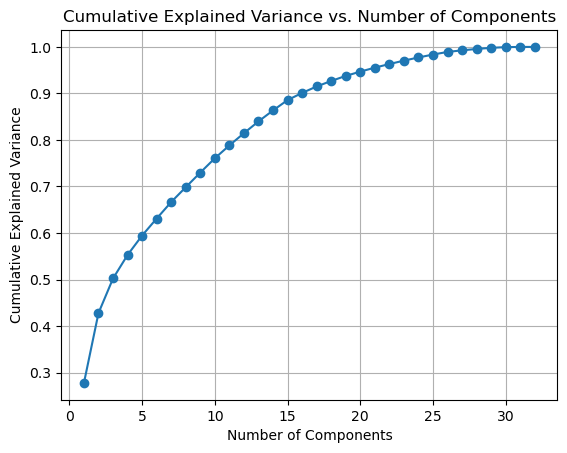

In [245]:


# Preprocess non-numeric columns
df_encoded = df.copy()
label_encoder = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Convert DataFrame to a NumPy array after preprocessing
data = df_encoded.values
column_names = df.columns
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA on the scaled data
pca = PCA()
pca.fit(data_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()






In [246]:
chosen_num_components = 15  # Set the number of components to retain


pca = PCA(n_components=chosen_num_components)
data_pca = pca.fit_transform(data_scaled)

data_reduced = pca.transform(data_scaled)
loadings_df = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(chosen_num_components)], index=column_names)

print("Loadings:")
print(loadings_df)

Loadings:
                                    PC1       PC2       PC3       PC4  \
gender                         0.002010 -0.000672  0.000459 -0.001844   
age                           -0.043376  0.008690 -0.080881 -0.405875   
married                        0.026038  0.232505  0.151824  0.310929   
numberofdependents             0.063706  0.081359  0.167560  0.424333   
zipcode                        0.008514  0.004536  0.008757  0.006392   
numberofreferrals              0.039269  0.210264  0.174179  0.343558   
tenureinmonths                 0.032552  0.411606  0.096140 -0.135397   
offer                         -0.013002 -0.162495 -0.052968  0.126643   
phoneservice                   0.068426  0.068970 -0.524603  0.198238   
avgmonthlylongdistancecharges  0.032892  0.099471 -0.447243  0.182415   
multiplelines                 -0.106642  0.085189  0.405229 -0.291405   
internetservice               -0.324859  0.074254  0.002415  0.011876   
internettype                   0.234487 -

In [232]:

correlation_matrix = df.corr()

# Create an empty dictionary to store the pairs with correlation over 0.5
correlation_dict = {}

# Iterate through the correlation matrix to find pairs with correlation over 0.5
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and correlation_matrix.loc[col1, col2] > 0.5:
            correlation_dict[col1] = col2

# Display the resulting dictionary
print(correlation_dict)

{'tenureinmonths': 'totalrevenue', 'avgmonthlylongdistancecharges': 'totallongdistancecharges', 'monthlycharge': 'totalrevenue', 'totalcharges': 'totalrevenue', 'totallongdistancecharges': 'totalrevenue', 'totalrevenue': 'totallongdistancecharges'}


In [233]:
# Assuming you have a DataFrame 'data' with features and a target column 'target'
X = data[:, :-1]  # Select all rows and all columns except the last column
y = data[:, -1]

# Create a Logistic Regression model
model = LogisticRegression()

# Create a StratifiedKFold object with 5 splits for outer cross-validation
outer_stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store the results
outer_scores = []

# Outer cross-validation loop
for train_outer_index, test_outer_index in outer_stratified_kfold.split(X, y):
    X_train_outer, X_test_outer = X[train_outer_index], X[test_outer_index]
    y_train_outer, y_test_outer = y[train_outer_index], y[test_outer_index]

    # Create a StratifiedKFold object with 2 splits for inner cross-validation
    inner_stratified_kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

    # Inner cross-validation loop
    inner_scores = []
    for train_inner_index, test_inner_index in inner_stratified_kfold.split(X_train_outer, y_train_outer):
        X_train_inner, X_test_inner = X_train_outer[train_inner_index], X_train_outer[test_inner_index]
        y_train_inner, y_test_inner = y_train_outer[train_inner_index], y_train_outer[test_inner_index]

        # Train the model on inner train set and evaluate on inner test set
        model.fit(X_train_inner, y_train_inner)
        y_pred_inner = model.predict(X_test_inner)
        inner_score = accuracy_score(y_test_inner, y_pred_inner)
        inner_scores.append(inner_score)

    # Average the inner scores to get the cross-validated score for this outer fold
    outer_scores.append(sum(inner_scores) / len(inner_scores))

# Calculate the average cross-validated score and standard deviation
average_score = sum(outer_scores) / len(outer_scores)
std_dev = np.std(outer_scores)

# Print the results
print("Average Cross-Validated Score:", average_score)
print("Standard Deviation of Cross-Validated Scores:", std_dev)

Average Cross-Validated Score: 0.7566021390457864
Standard Deviation of Cross-Validated Scores: 0.0016701862748642437


In [22]:
df['A'] = df['monthlycharge']

# Step 2: Define a function to calculate the instance-dependent cost
def instance_dependent_cost(predicted_label, true_label, A):
    if true_label == 1 and predicted_label == 1:  # True Positive (TP)
        return 0
    elif true_label == 0 and predicted_label == 1:  # False Positive (FP)
        return 2 * A
    elif true_label == 0 and predicted_label == 0:  # True Negative (TN)0
        return 0
    elif true_label == 1 and predicted_label == 0:  # False Negative (FN)
        return 12 * A

# Step 3: Apply the function to calculate the cost for each instance and create the instance-dependent cost matrix
df['instance_cost'] = df.apply(lambda row: instance_dependent_cost(row['predicted_labels'], row['true_labels'], row['A']), axis=1)

# Print the DataFrame with the instance-dependent cost matrix
print(df[['monthlycharge', 'predicted_labels', 'true_labels', 'instance_cost']])

KeyError: 'predicted_labels'

In [258]:
X_train = np.array([[...], [...], ...])  # Replace '...' with your actual features

# Example binary target labels
y_train = np.array([0, 1, 1, 0])  # Replace with your actual target labels

# Create a list to store instance-dependent predicted probabilities (X values)
instance_probs = []

# Train a logistic regression model for each instance and get the predicted probabilities
for i in range(len(X_train)):
    # Select the i-th instance as a single-sample training set
    X_single_instance = X_train[i].reshape(1, -1)
    y_single_instance = y_train[i]

    # Create a logistic regression model
    model = LogisticRegression()

    # Fit the model to the single-instance data
    model.fit(X_single_instance, [y_single_instance])

    # Predict the probability for class 1 (positive class)
    prob_class_1 = model.predict_proba(X_single_instance)[:, 1]

    # Append the predicted probability to the list
    instance_probs.append(prob_class_1[0])

# Convert the list to a numpy array
X_predicted_probs = np.array(instance_probs)

# Now, X_predicted_probs contains the instance-dependent predicted probabilities (X values)
print("Instance-Dependent Predicted Probabilities (X):", X_predicted_probs)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [256]:
def cross_entropy_cost(hypothesis, y_true):
    # Ensure the hypothesis values are clipped to avoid taking the logarithm of zero
    epsilon = 1e-15
    hypothesis = np.clip(hypothesis, epsilon, 1 - epsilon)

    # Calculate the cross-entropy cost
    cost = -np.mean(y_true * np.log(hypothesis) + (1 - y_true) * np.log(1 - hypothesis))
    return cost




In [257]:
y_true = np.array([0, 1, 1, 0])
instance_costs = [cross_entropy_cost(X[i], y_true[i]) for i in range(len(X))]

IndexError: index 4 is out of bounds for axis 0 with size 4